In [118]:
# Reguired Libraries
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Load the dataset
df = pd.read_csv("CharlesBookClub.csv")

# Show the first few rows
df.head()

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=46233) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1


**Part A**

In [120]:
# Statistical Summary
df.describe()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,...,0.125250,0.037500,0.045750,0.084500,0.885000,4.281250,3.170000,2.085750,0.084500,0.915500
std,1154.844867,9484.433792,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,...,0.385486,0.214721,0.220611,0.278171,1.226234,0.915619,0.928071,0.831907,0.278171,0.278171
min,1.000000,25.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000,1.000000
50%,2000.500000,16581.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,1.000000
75%,3000.250000,24838.250000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,3.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,...,3.000000,2.000000,2.000000,1.000000,8.000000,5.000000,4.000000,3.000000,1.000000,1.000000


In [122]:
df.isnull().sum()

Seq#                0
ID#                 0
Gender              0
M                   0
R                   0
F                   0
FirstPurch          0
ChildBks            0
YouthBks            0
CookBks             0
DoItYBks            0
RefBks              0
ArtBks              0
GeogBks             0
ItalCook            0
ItalAtlas           0
ItalArt             0
Florence            0
Related Purchase    0
Mcode               0
Rcode               0
Fcode               0
Yes_Florence        0
No_Florence         0
dtype: int64

In [124]:
df.drop(['ID#', 'Seq#'], axis=1, inplace=True)

In [126]:
# Create the target column based on Yes_Florence
df['FlorenceBuyer'] = df['Yes_Florence'].apply(lambda x: 1 if x == 1 else 0)

In [128]:
df.head()

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,...,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence,FlorenceBuyer
0,1,297,14,2,22,0,1,1,0,0,...,0,0,0,0,5,4,2,0,1,0
1,0,128,8,2,10,0,0,0,0,0,...,0,0,0,0,4,3,2,0,1,0
2,1,138,22,7,56,2,1,2,0,1,...,0,0,0,2,4,4,3,0,1,0
3,1,228,2,1,2,0,0,0,0,0,...,0,0,0,0,5,1,1,0,1,0
4,1,257,10,1,10,0,0,0,0,0,...,0,0,0,0,5,3,1,0,1,0


In [130]:
# No need anymore
df.drop(columns=['Yes_Florence', 'No_Florence'], inplace=True)
df.head()

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,...,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,FlorenceBuyer
0,1,297,14,2,22,0,1,1,0,0,...,0,0,0,0,0,0,5,4,2,0
1,0,128,8,2,10,0,0,0,0,0,...,0,0,0,0,0,0,4,3,2,0
2,1,138,22,7,56,2,1,2,0,1,...,1,1,0,0,0,2,4,4,3,0
3,1,228,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,5,1,1,0
4,1,257,10,1,10,0,0,0,0,0,...,0,0,0,0,0,0,5,3,1,0


In [132]:
data = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 
              'GeogBks', 'ItalAtlas', 'ItalArt']

# Sum of books bought per genre
df[data].sum().sort_values(ascending=False)


# Average each purchases grouped by FlorenceBuyer
df.groupby('FlorenceBuyer')[genre_cols].mean().T.sort_values(by=1, ascending=False)

FlorenceBuyer,0,1
CookBks,0.732933,0.713018
ChildBks,0.634899,0.692308
GeogBks,0.370289,0.573964
ArtBks,0.267886,0.517751
DoItYBks,0.346532,0.396450
YouthBks,0.298744,0.369822
RefBks,0.250956,0.313609
ItalArt,0.042054,0.085799
ItalAtlas,0.036046,0.053254


In [134]:
# Check average recency/frequency/monetary values
df.groupby('FlorenceBuyer')[['R', 'F', 'M']].mean()

,R,F,M
FlorenceBuyer,,,
0,13.537411,3.749590,207.031677
1,11.798817,4.739645,219.573964


lower recency score means they purchased more recently.
higher frequency score they bought more often.
higher monetary value they spent more overall.

In [137]:
# correlation
df[data + ['FlorenceBuyer']].corr()['FlorenceBuyer'].sort_values(ascending=False)

FlorenceBuyer    1.000000
ArtBks           0.115670
GeogBks          0.075476
ItalArt          0.055159
YouthBks         0.032310
RefBks           0.031219
ItalAtlas        0.022294
DoItYBks         0.020183
ChildBks         0.016060
CookBks         -0.005085
Name: FlorenceBuyer, dtype: float64

From the data, it looks like people who bought the Florence book were more into genres like Art, Geography, and Youth books. They also seemed more active overall, they bought books more often, spent more, and didn’t wait as long between purchases. Basically, the ones who were more engaged and into educational or cultural stuff were more likely to go for the Florence travel book.


**Q1:** The features that seem to influence whether someone buys the Florence travel book are mostly their genre preferences and how active they are. People who bought it were more into Art, Geography, and Youth books. They also spent more, bought more often, and made purchases more recently. So overall, the more engaged and culturally interested customers were more likely to go for this specialty book.

In [141]:
# Separate features and target
X = df.drop(['FlorenceBuyer','Florence'], axis=1)
y = df['FlorenceBuyer']
# Convert categorical columns if needed (e.g., Gender)
X = pd.get_dummies(X, drop_first=True)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Part B**

In [143]:

# Train model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.91
Precision: 0.17
Recall: 0.03


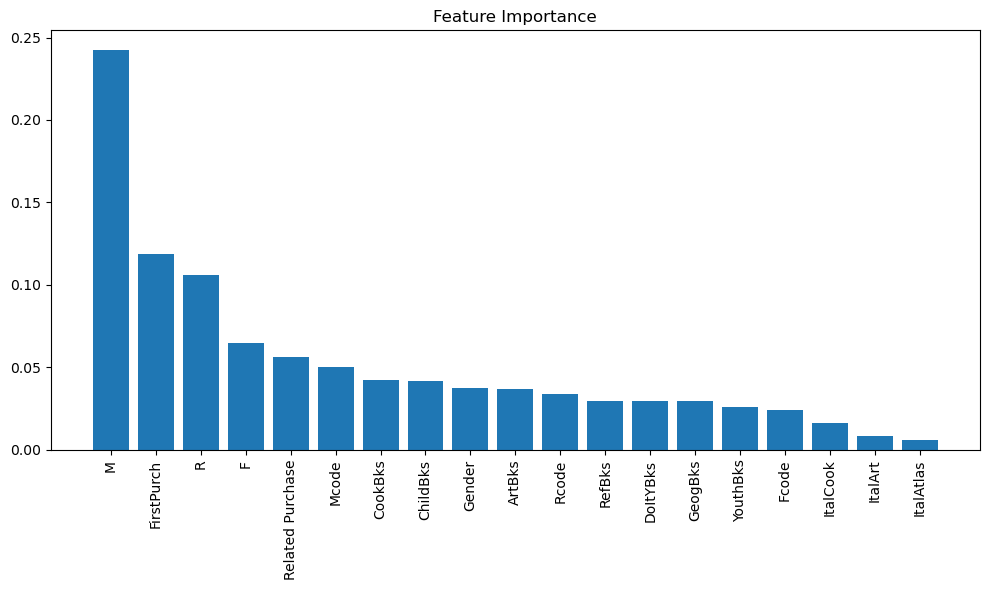

In [145]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Looking at the plot, the biggest driver for buying the Florence book is M. So basically, customers who’ve spent more money overall. That kinda makes sense, since people who spend more are usually more into buying specialty stuff. Then comes FirstPurch and R, which show that both long-time and more recent buyers are more likely to go for it. Mcode and CookBks also stand out, so maybe people from specific marketing groups or those into cookbooks are more into travel-related or niche books like this one. Overall, it looks like high-spending and active customers, especially those into cooking or cultural stuff, are the ones more likely to buy the Florence book.

**Q2:** Random Forest works better here because it can catch more complex patterns that logistic regression might miss. Logistic regression is kinda basic. It just looks for a straight-line relationship. But in this case, customer behavior is more complicated. Things like spending habits, book interests, and how recently they bought something all interact in different ways. Since Random Forest uses multiple trees, it’s way better at picking up those non-linear patterns and mixed signals in the data.

In [167]:
genre_cols = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 
              'ArtBks', 'GeogBks', 'ItalAtlas', 'ItalArt']

#  Convert to boolean True/False
data_df = df[genre_cols].applymap(lambda x: True if x > 0 else False)

#  Double-check if all values are really boolean
print(data_df.dtypes)

#  Now apply Apriori
frequent_itemsets = apriori(data_df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

ChildBks     bool
YouthBks     bool
CookBks      bool
DoItYBks     bool
RefBks       bool
ArtBks       bool
GeogBks      bool
ItalAtlas    bool
ItalArt      bool
dtype: object
    support                                 itemsets
0   0.39400                               (ChildBks)
1   0.23825                               (YouthBks)
2   0.41550                                (CookBks)
3   0.25475                               (DoItYBks)
4   0.20475                                 (RefBks)
5   0.22300                                 (ArtBks)
6   0.26675                                (GeogBks)
7   0.14750                     (ChildBks, YouthBks)
8   0.24200                      (CookBks, ChildBks)
9   0.16150                     (ChildBks, DoItYBks)
10  0.12825                       (ChildBks, RefBks)
11  0.10525                       (ArtBks, ChildBks)
12  0.14625                      (ChildBks, GeogBks)
13  0.16100                      (CookBks, YouthBks)
14  0.10325                  

/var/folders/m_/pqldzfk929g_v5k72f6g6sx80000gn/T/ipykernel_46233/122667653.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_df = df[genre_cols].applymap(lambda x: True if x > 0 else False)


In [171]:
# Using Apriori
frequent_itemsets = apriori(data_df, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
     support                                 itemsets
0   0.39400                               (ChildBks)
1   0.23825                               (YouthBks)
2   0.41550                                (CookBks)
3   0.25475                               (DoItYBks)
4   0.20475                                 (RefBks)
5   0.22300                                 (ArtBks)
6   0.26675                                (GeogBks)
7   0.14750                     (ChildBks, YouthBks)
8   0.24200                      (CookBks, ChildBks)
9   0.16150                     (ChildBks, DoItYBks)
10  0.12825                       (ChildBks, RefBks)
11  0.10525                       (ArtBks, ChildBks)
12  0.14625                      (ChildBks, GeogBks)
13  0.16100                      (CookBks, YouthBks)
14  0.10325                     (DoItYBks, YouthBks)
15  0.08125                       (RefBks, YouthBks)
16  0.06950                       (ArtBks, YouthBks)
17  0.10450              

In [173]:
# Generate association rules
# min_threshold for confidence is set to 0.4 (40%)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Sort top rules by Lift
sorted_rules = rules.sort_values(by='lift', ascending=False)
rules.head(3)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ChildBks),(YouthBks),0.39400,0.23825,0.1475,0.374365,1.571314,1.0,0.053629,1.217564,0.599983,0.304281,0.178688,0.496732
1,(YouthBks),(ChildBks),0.23825,0.39400,0.1475,0.619098,1.571314,1.0,0.053629,1.590959,0.477309,0.304281,0.371448,0.496732
2,(CookBks),(ChildBks),0.41550,0.39400,0.2420,0.582431,1.478251,1.0,0.078293,1.451256,0.553507,0.426432,0.310942,0.598322


So the first rule says that people who buy Child books usually end up getting Youth books too. The second rule is basically the same thing but in reverse — Youth book buyers also grab Child books. The third one is people who get Cookbooks also tend to buy Child books. All three have pretty strong lift scores (over 1.4), which means these combos happen more than just by chance, they’re actually connected.

If a customer purchases Child or Youth books, there’s a strong likelihood they’ll be interested in the other category as well, making them ideal for cross-promotion. Additionally, the link between Cookbooks and Child books could indicate that many buyers are parents or caregivers. Recommending or bundling these genres together could be a strategic move to increase overall sales.